# Case study on a wellness technology company - Bellabeat
The following case study will answer basic question that will guide business decision making process of stakeholders at Bellabeat. This case study will be based on the steps of the data analysis process: Ask, Prepare, Process, Analyze, Share and Act.

**About the company**

Bellabeat is a high-tech company that manufactures health-focused smart products was founded in 2013.It has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. Collecting data on activity, sleep and stress has allowed Bellabeat to empower women with knowledge about their own health and habits. 


## Phase 1 Ask

**Stakeholders**

- Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
- Sando Mur: Mathematician and Bellabeat’s cofounder
- Bellabeat marketing analytics team

**Research questions**

- What are some trends in smart device usage?
- How could these trends apply to Bellabeat customers?
- How could these trends help influence Bellabeat marketing strategy?

**Business Task**

Identify and analyze trends in smart device usage to determine new growth opportunities for Bellabeat customers and influence marketing strategy of the analytics team.

## Phase 2 Prepare

**Data Source** 

The dataset used in this case study is called FitBit Fitness Tracker Data (CC0: Public Domain provided by Möbius.)  It is publicly stored on Kaggle and made available by FitBit Fitness Tracker. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.Therefore, we can conclude the data is credible.

**Data Limitations** 

- Small Sample Size: 30 participants is not a well representative sample size.
- Limited time of Data Collcetion: 31 days of data does not reflect all seasonal trends of users. 
- No Information on Demographics: Gender or age couldnot be taken into account when analyzing the data.

**Importing Libraries**

Now let's import all the R packages we will be using for our analysis. 

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(purrr)
library(scales)
library(RColorBrewer)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor



**Reading CSV. Files**

Now let's read and name the csv files that are useful for this analysis.

In [2]:
hourlySteps <- read_csv("hourlySteps_merged.csv")
hourlyCalories <-read_csv ("hourlyCalories_merged.csv")
hourlyIntensities <-read_csv("hourlyIntensities_merged.csv")
dailyactivity <-read_csv ("dailyActivity_merged.csv")
sleepDay <-read_csv ("sleepDay_merged.csv")

Parsed with column specification:
cols(
  Id = col_double(),
  ActivityHour = col_character(),
  StepTotal = col_double()
)
Parsed with column specification:
cols(
  Id = col_double(),
  ActivityHour = col_character(),
  Calories = col_double()
)
Parsed with column specification:
cols(
  Id = col_double(),
  ActivityHour = col_character(),
  TotalIntensity = col_double(),
  AverageIntensity = col_double()
)
Parsed with column specification:
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)
Parsed with column s

**Reviewing stracture of the dataset** 

In [3]:
str(hourlySteps)
str(hourlyCalories)
str(hourlyIntensities)
str(dailyactivity)
str(sleepDay)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : num  373 160 151 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   StepTotal = col_double()
  .. )
Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : num  81 61 59 47 48 48 48 47 68 141 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   Calories = col_double()
  .. )
Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	22099 obs. of  4 variables:
 $ Id  

**Preview Datasets**

In [4]:
head(hourlySteps,3)
head(hourlyCalories,3)
head(hourlyIntensities,3)
head(dailyactivity,3)
head(sleepDay,3)

Id,ActivityHour,StepTotal
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151


Id,ActivityHour,Calories
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59


Id,ActivityHour,TotalIntensity,AverageIntensity
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442


## Phase 3 Process

**Tools Used**

R: Data processing, analysis and visualization will be done using R Programming in Jupyter Notebook

#### Data Cleaning

Now let's transform the data to do our analysis. The data cleaning process is clearly documented as follows

**Checkiing for duplicates**

In [5]:
sum(duplicated(hourlySteps))
sum(duplicated(hourlyCalories))
sum(duplicated(hourlyIntensities))
sum(duplicated(dailyactivity))
sum(duplicated(sleepDay))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 3

**Removing duplicates**

3 duplicates were found in sleepDay dataframe. We will remove those duplicates.

In [6]:
sleepDay <- sleepDay %>%
distinct() %>%
drop_na()

**Recheckiing duplicates**

In [7]:
sum(duplicated(hourlySteps))
sum(duplicated(hourlyCalories))
sum(duplicated(hourlyIntensities))
sum(duplicated(dailyactivity))
sum(duplicated(sleepDay))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

**Checking for N/A in dataframes**

In [8]:
sum(is.na(hourlySteps))
sum(is.na(hourlyCalories))
sum(is.na(hourlyIntensities))
sum(is.na(dailyactivity))
sum(is.na(sleepDay))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

**Merging 3 hourly datas in to 1 for easier interpretation**

In [9]:
hourlyDatas <- merge(hourlySteps,hourlyCalories)
hourlyActivity <- merge(hourlyDatas,hourlyIntensities)

In [10]:
head(hourlyActivity,3)

Id,ActivityHour,StepTotal,Calories,TotalIntensity,AverageIntensity
1503960366,4/12/2016 1:00:00 AM,160,61,8,0.133333
1503960366,4/12/2016 1:00:00 PM,221,66,6,0.100000
1503960366,4/12/2016 10:00:00 AM,676,99,29,0.483333


**Changing date time format of the dataframes**

To enable an hour by hour analysis, we need to format all date and time attributes into POSIXct.

In [11]:
hourlyActivity <- separate(hourlyActivity,ActivityHour,into = c("Date","Time","AM/PM"),sep = " ")
hourlyActivity <- unite(hourlyActivity,Timestamp,c("Time","AM/PM"),sep = " ")
hourlyActivity$Timestamp <- format(as.POSIXct(hourlyActivity$Timestamp,format = '%I:%M:%S %p'),format= "%H:%M:%S")

In [12]:
head(hourlyActivity,3)

Id,Date,Timestamp,StepTotal,Calories,TotalIntensity,AverageIntensity
1503960366,4/12/2016,01:00:00,160,61,8,0.133333
1503960366,4/12/2016,13:00:00,221,66,6,0.100000
1503960366,4/12/2016,10:00:00,676,99,29,0.483333


In [13]:
head(sleepDay,3)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442


In [14]:
sleepDay <- separate(sleepDay,SleepDay,into = c("Date","Time","AM/PM"),sep = " ")
sleepDay <- unite(sleepDay,Timestamp,c("Time","AM/PM"),sep = " ")
sleepDay$Timestamp <- format(as.POSIXct(sleepDay$Timestamp,format = '%I:%M:%S %p'),format= "%H:%M:%S")

In [15]:
head(sleepDay,3)

Id,Date,Timestamp,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
1503960366,4/12/2016,00:00:00,1,327,346
1503960366,4/13/2016,00:00:00,2,384,407
1503960366,4/15/2016,00:00:00,1,412,442


Now our data is squicky clean and ready for actual analysis.

## Pahse 4 Analyze

Now we are ready to perform calculations and identify trends and relationships in our data so we can generate a meaningful insight. 

In [16]:
head(dailyactivity,3)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776


In [17]:
dailyactivity %>%
    select(TotalSteps,Calories) %>%
    summary()

   TotalSteps       Calories   
 Min.   :    0   Min.   :   0  
 1st Qu.: 3790   1st Qu.:1828  
 Median : 7406   Median :2134  
 Mean   : 7638   Mean   :2304  
 3rd Qu.:10727   3rd Qu.:2793  
 Max.   :36019   Max.   :4900  

In [18]:
dailyactivity %>%
    select(VeryActiveMinutes, FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes ) %>%
    summary()

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0        Min.   :   0.0  
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0        1st Qu.: 729.8  
 Median :  4.00    Median :  6.00      Median :199.0        Median :1057.5  
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8        Mean   : 991.2  
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0        3rd Qu.:1229.5  
 Max.   :210.00    Max.   :143.00      Max.   :518.0        Max.   :1440.0  

In [19]:
sleepDay %>%
    select(TotalMinutesAsleep, TotalTimeInBed) %>%
    summary()

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.8  
 Median :432.5      Median :463.0  
 Mean   :419.2      Mean   :458.5  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

**Key Summary Insight**

When we compare the activity levels most of the peoople are reported to be sedentary with a very few fairly active minutes.
The average steps taken is 7,638 per day and the average calories burnet is 2,304.

- The average sedentary time is 991 minutes which is the max and our goalis to reduce sedentary minutes to more active minutes. 
- Average total steps per day is 7638. Our goal is to increase the total steps per day 
- The average calories burnet is reported as 2,304
- Average sleep time is approx. 7 hours/day.
- When active, participants are engaged mostly in light activity.

## Phase 5 Share

Now let's further continue our analysis and support our findings with visualizations so we can present a meaningful insigh to our stakeholders.

**Analysis on average steps and intensities**

We will have a closer look on what time of a day that participants are engaged in activities that help them burn more calories.

In [20]:
hourlyActivitySummary <- hourlyActivity %>% 
  group_by(Timestamp) %>% summarise(AverageStep = mean(StepTotal), AverageCalorie = mean(Calories), AverageIntensity = mean(TotalIntensity))

In [21]:
head(hourlyActivitySummary,3)

Timestamp,AverageStep,AverageCalorie,AverageIntensity
00:00:00,42.18844,71.80514,2.129550
01:00:00,23.10289,70.16506,1.419078
02:00:00,17.11040,69.18650,1.043944


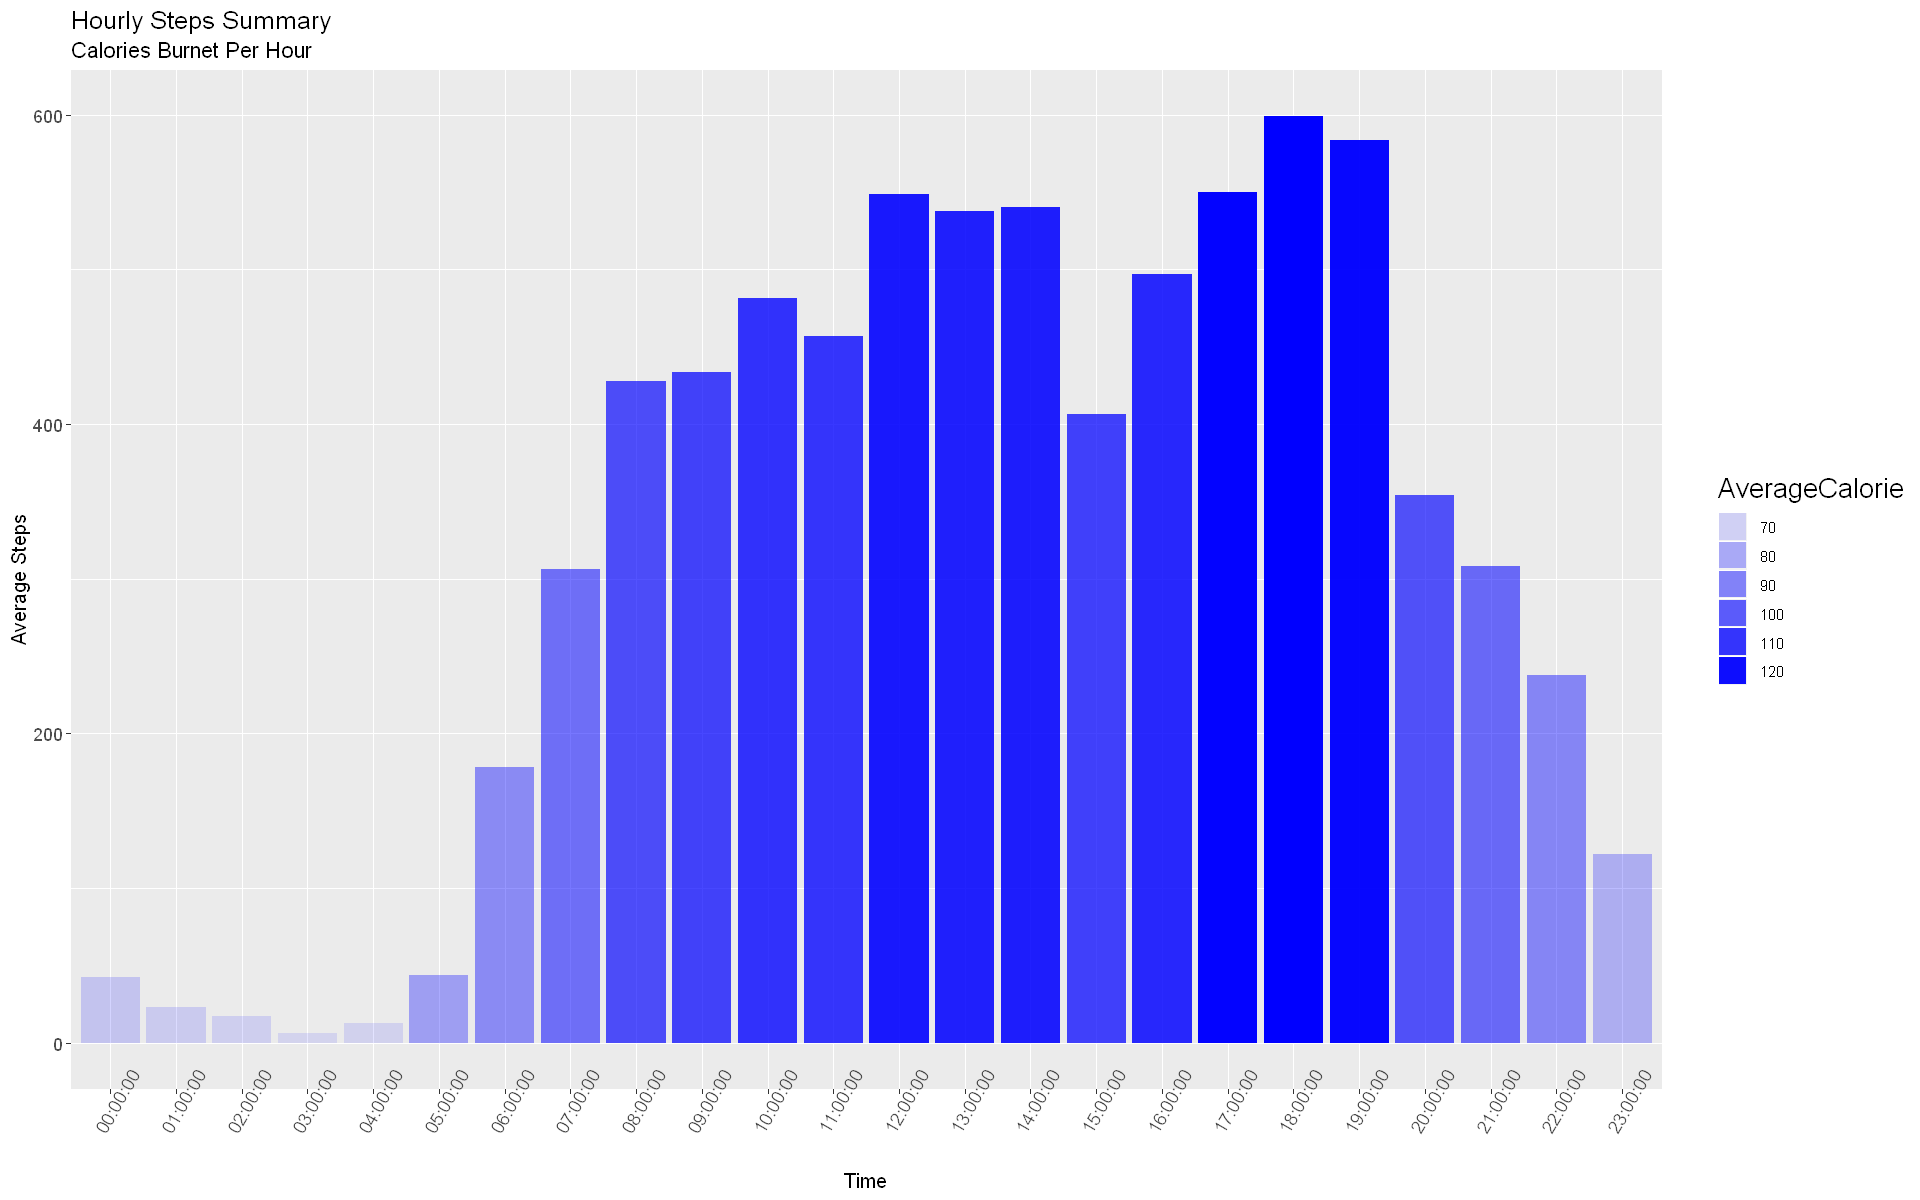

In [24]:
ggplot(data = hourlyActivitySummary)+
  geom_col(aes(x = Timestamp, y = AverageStep, alpha = AverageCalorie), fill = "blue") + 
  theme(axis.title = element_text(size = 12),
        axis.text.x = element_text(angle = 60, size = 11),
        axis.text.y = element_text(size = 11),
        legend.title = element_text(size = 16),
        legend.box.spacing = unit(1.0,'cm'),
        plot.title = element_text(size = 15),
        plot.subtitle = element_text(size = 13)) +
  xlab("Time") + ylab("Average Steps") + 
  labs(title = "Hourly Steps Summary", subtitle = "Calories Burnet Per Hour")

options(repr.plot.width=18, repr.plot.height=7)

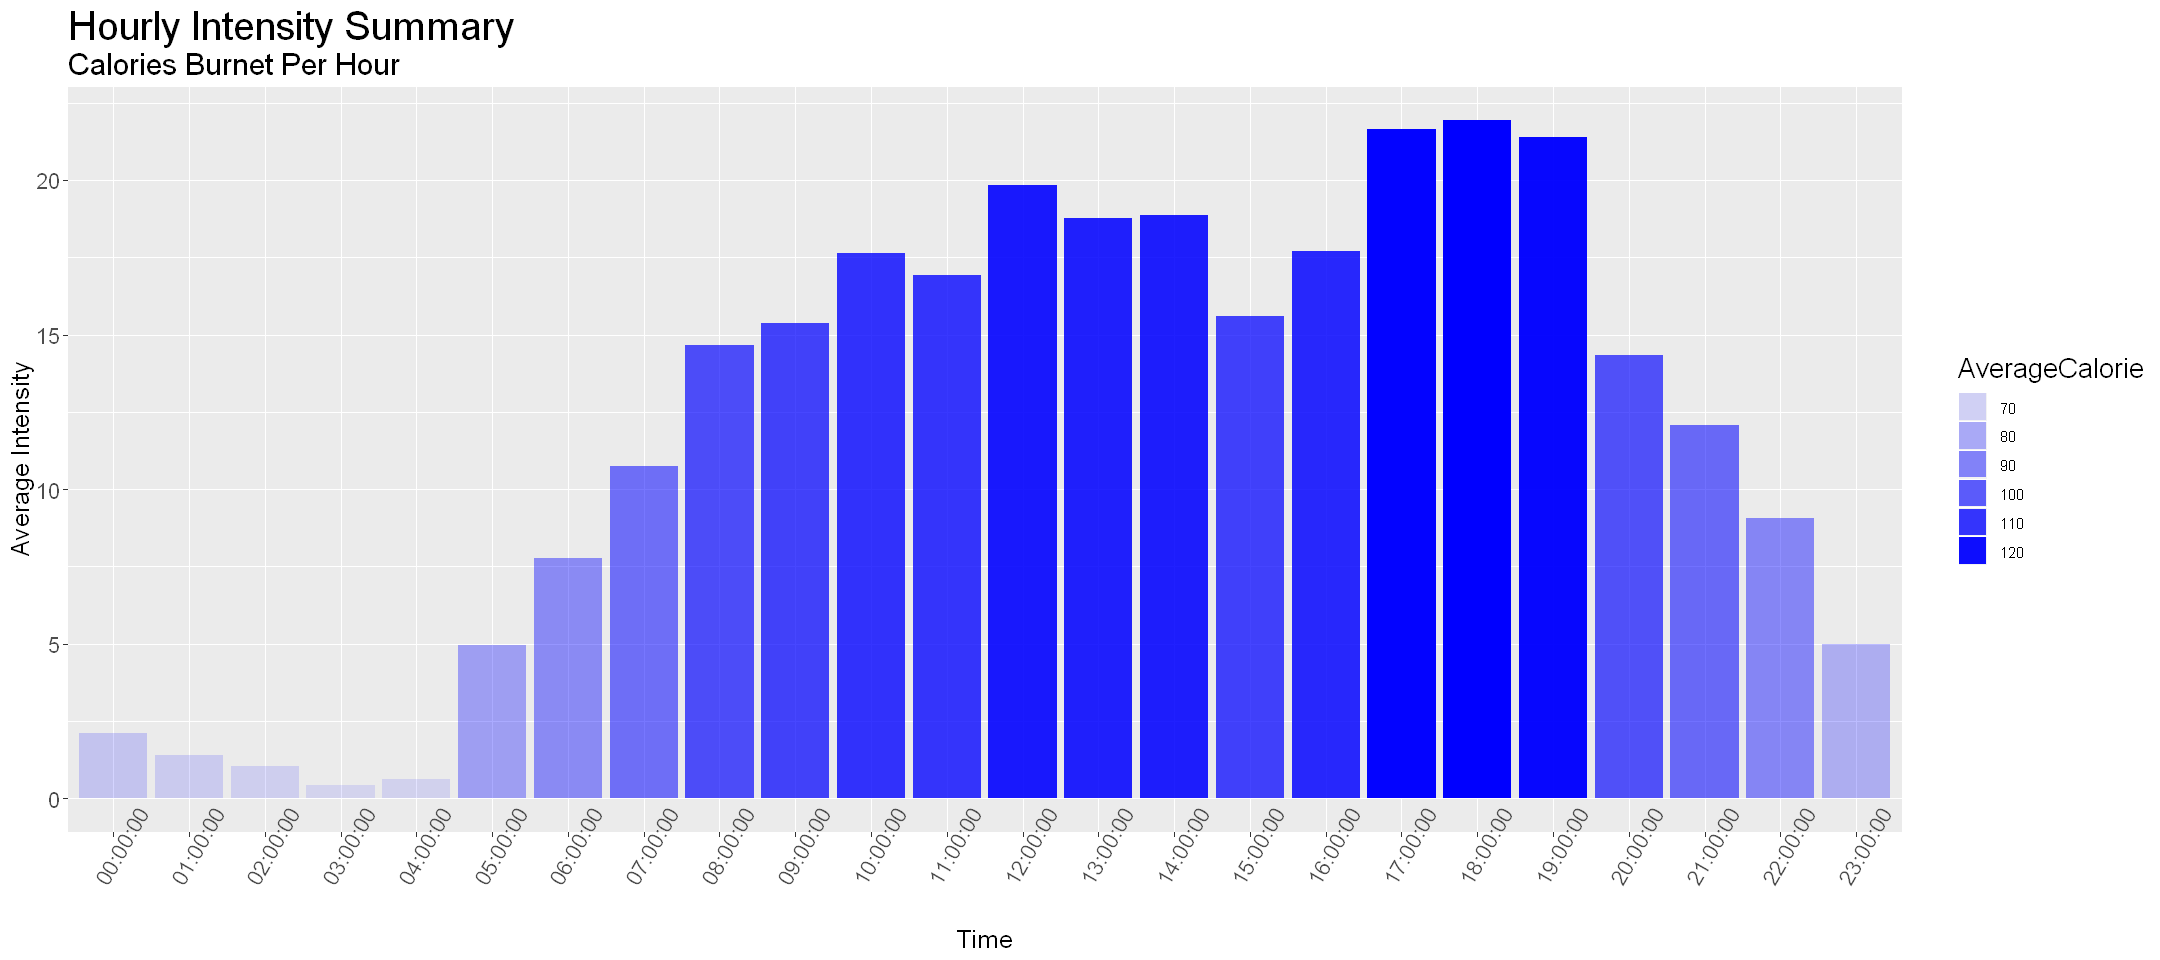

In [23]:
ggplot(data = hourlyActivitySummary)+
  geom_col(aes(x = Timestamp, y = AverageIntensity, alpha = AverageCalorie), fill = "blue") + 
  theme(axis.title = element_text(size = 15),
        axis.text.x = element_text(angle = 60, size = 13),
        axis.text.y = element_text(size = 13),
        legend.title = element_text(size = 16),
        legend.box.spacing = unit(1.0,'cm'),
        plot.title = element_text(size = 24),
        plot.subtitle = element_text(size = 18)) +
  xlab("Time") + ylab("Average Intensity") + 
  labs(title = "Hourly Intensity Summary", subtitle = "Calories Burnet Per Hour")

options(repr.plot.width=16, repr.plot.height=10)

**Key Insight on daily steps and intensities**

- The graph shows us that the users took the most steps and burnt the most calories in the 5PM to 7PM timeframe. 

- The second most active timeframe was between 12PM to 2PM.

- Peak intensity is between 5 pm and 7 pm (after work)

- As we now know when users are active throughout the day, we can motivate users to get more active during these times.

**Analysing percentage share of minutes spent on different levels of activities**

In [25]:
head (dailyactivity,3)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776


In [26]:
dailyIntensities <- dailyactivity %>% 
summarise (meanVeryActive = mean(VeryActiveMinutes), 
           meanFairlyActive = mean(FairlyActiveMinutes),
           meanLightlyActive = mean(LightlyActiveMinutes),
           meanSedentary = mean(SedentaryMinutes))

In [27]:
head (dailyIntensities)

meanVeryActive,meanFairlyActive,meanLightlyActive,meanSedentary
21.16489,13.56489,192.8128,991.2106


In [28]:
copydata <- dailyIntensities %>%
gather(intensities, minutes, meanVeryActive:meanSedentary)
head(copydata, 4)

intensities,minutes
meanVeryActive,21.16489
meanFairlyActive,13.56489
meanLightlyActive,192.81277
meanSedentary,991.21064


In [29]:
copydata <- dailyIntensities %>%
gather(intensities, minutes, meanVeryActive:meanSedentary)
head(copydata, 4)

intensities,minutes
meanVeryActive,21.16489
meanFairlyActive,13.56489
meanLightlyActive,192.81277
meanSedentary,991.21064


In [30]:
intensityPercent <- group_by(copydata,intensities)%>%
mutate(totalPercent = minutes/sum(copydata$minutes))%>%
mutate(labels = scales::percent(totalPercent))

In [31]:
head(intensityPercent)

intensities,minutes,totalPercent,labels
meanVeryActive,21.16489,0.01736602,1.74%
meanFairlyActive,13.56489,0.01113014,1.11%
meanLightlyActive,192.81277,0.15820493,15.8%
meanSedentary,991.21064,0.81329891,81.3%


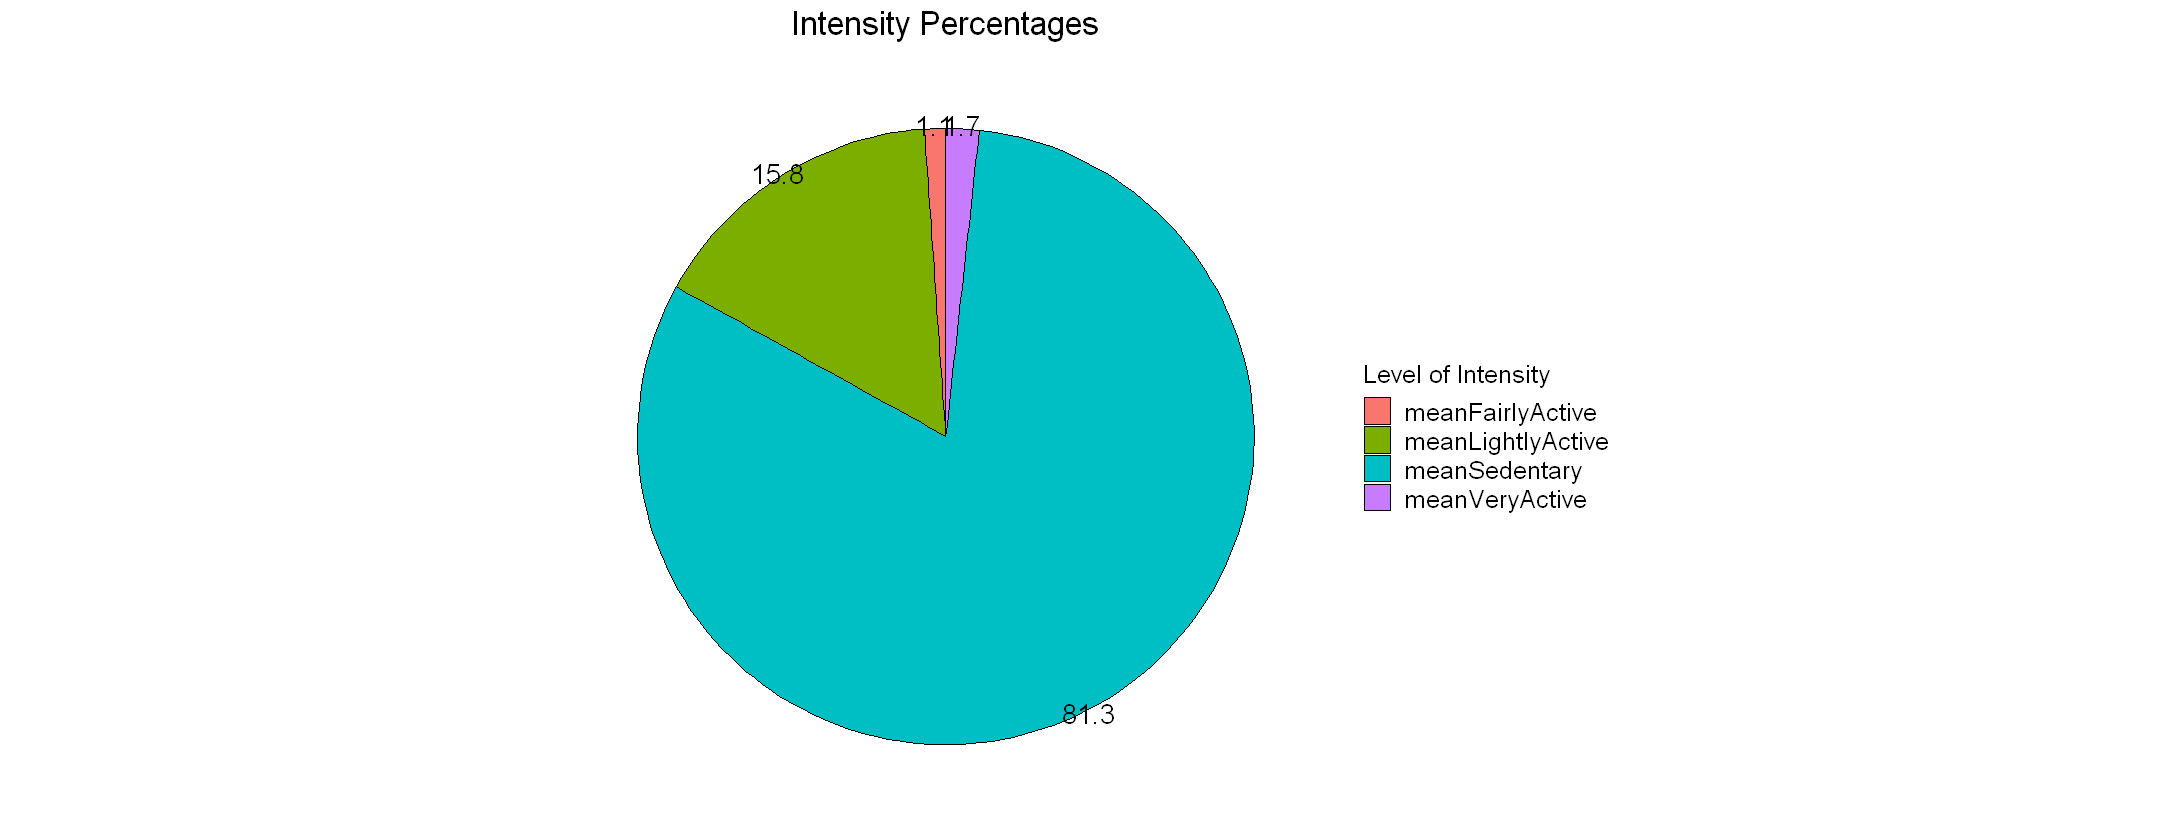

In [32]:
ggplot(intensityPercent, aes (x="", y = totalPercent, fill = intensities)) + 
  geom_col(position = 'stack', width = 0.25, color = "black") +
  geom_text(aes(label = paste(round(minutes / sum(minutes) * 100, 1)), x = 1.128),
            position = position_stack(vjust = 0.5), size = 5.75) +
  theme_classic() +
  theme(plot.title = element_text(hjust=0.5, size = 20),
        axis.line = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  theme(legend.title = element_text(size = 15),
       legend.text = element_text (size = 15))+
  labs(fill = "Level of Intensity",
       x = NULL,
       y = NULL,
       title = "Intensity Percentages") + 
  coord_polar("y")

**Key insights on percentage share of different activity minutes**

- From the above pie chart, you can see that a majority of users' days are spent being sedentary which contributes 81%.

- Participants who were engaged in fairly active and very active minutes contribute just close to 3% 

- In comparison to the average calories burned by the users in the analysis, the user's may in fact be consuming more calories than they burn per day.

**Analysing how the levels of activities contribute to calories burnet**

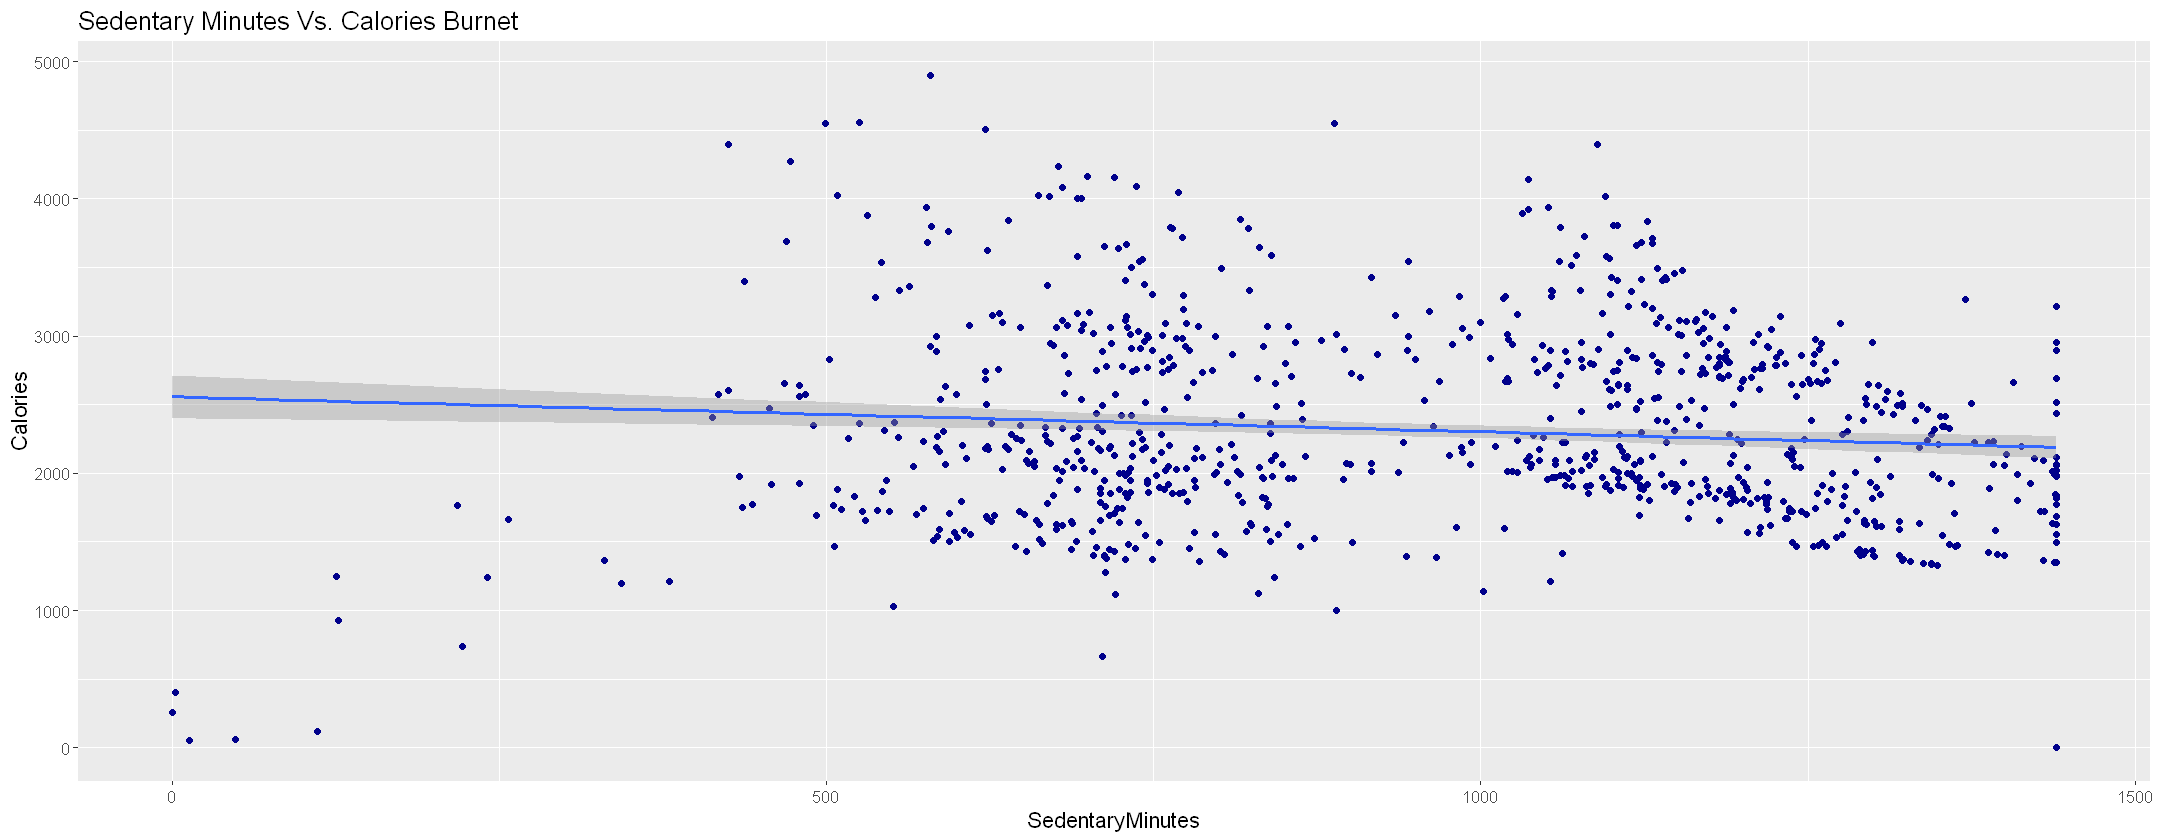

In [33]:
ggplot(dailyactivity, aes(y = Calories, x = SedentaryMinutes)) + geom_point(color = 'dark blue') +
stat_smooth (method = "lm") + labs (title = paste ("Sedentary Minutes Vs. Calories Burnet")) +
theme(text = element_text (size = 13))

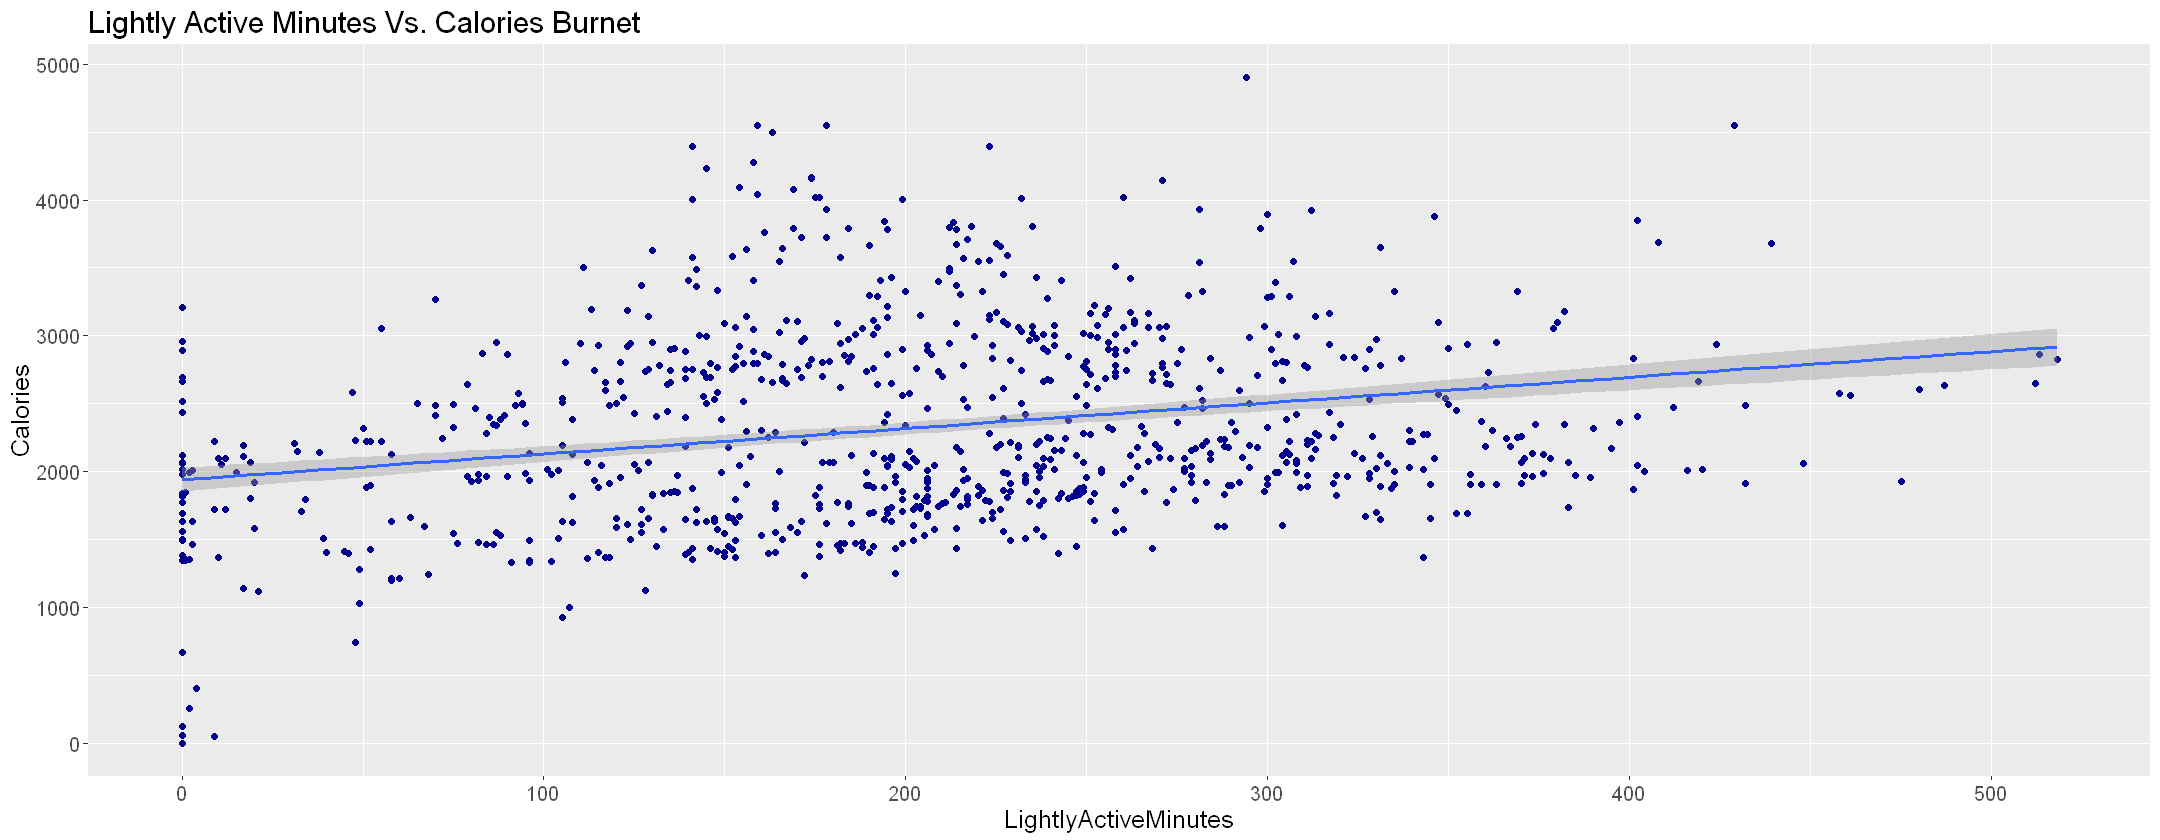

In [34]:
ggplot(dailyactivity, aes(y = Calories, x = LightlyActiveMinutes)) + geom_point(color = 'dark blue') +
stat_smooth (method = "lm") + labs (title = paste ("Lightly Active Minutes Vs. Calories Burnet")) + 
theme(text = element_text (size = 15))

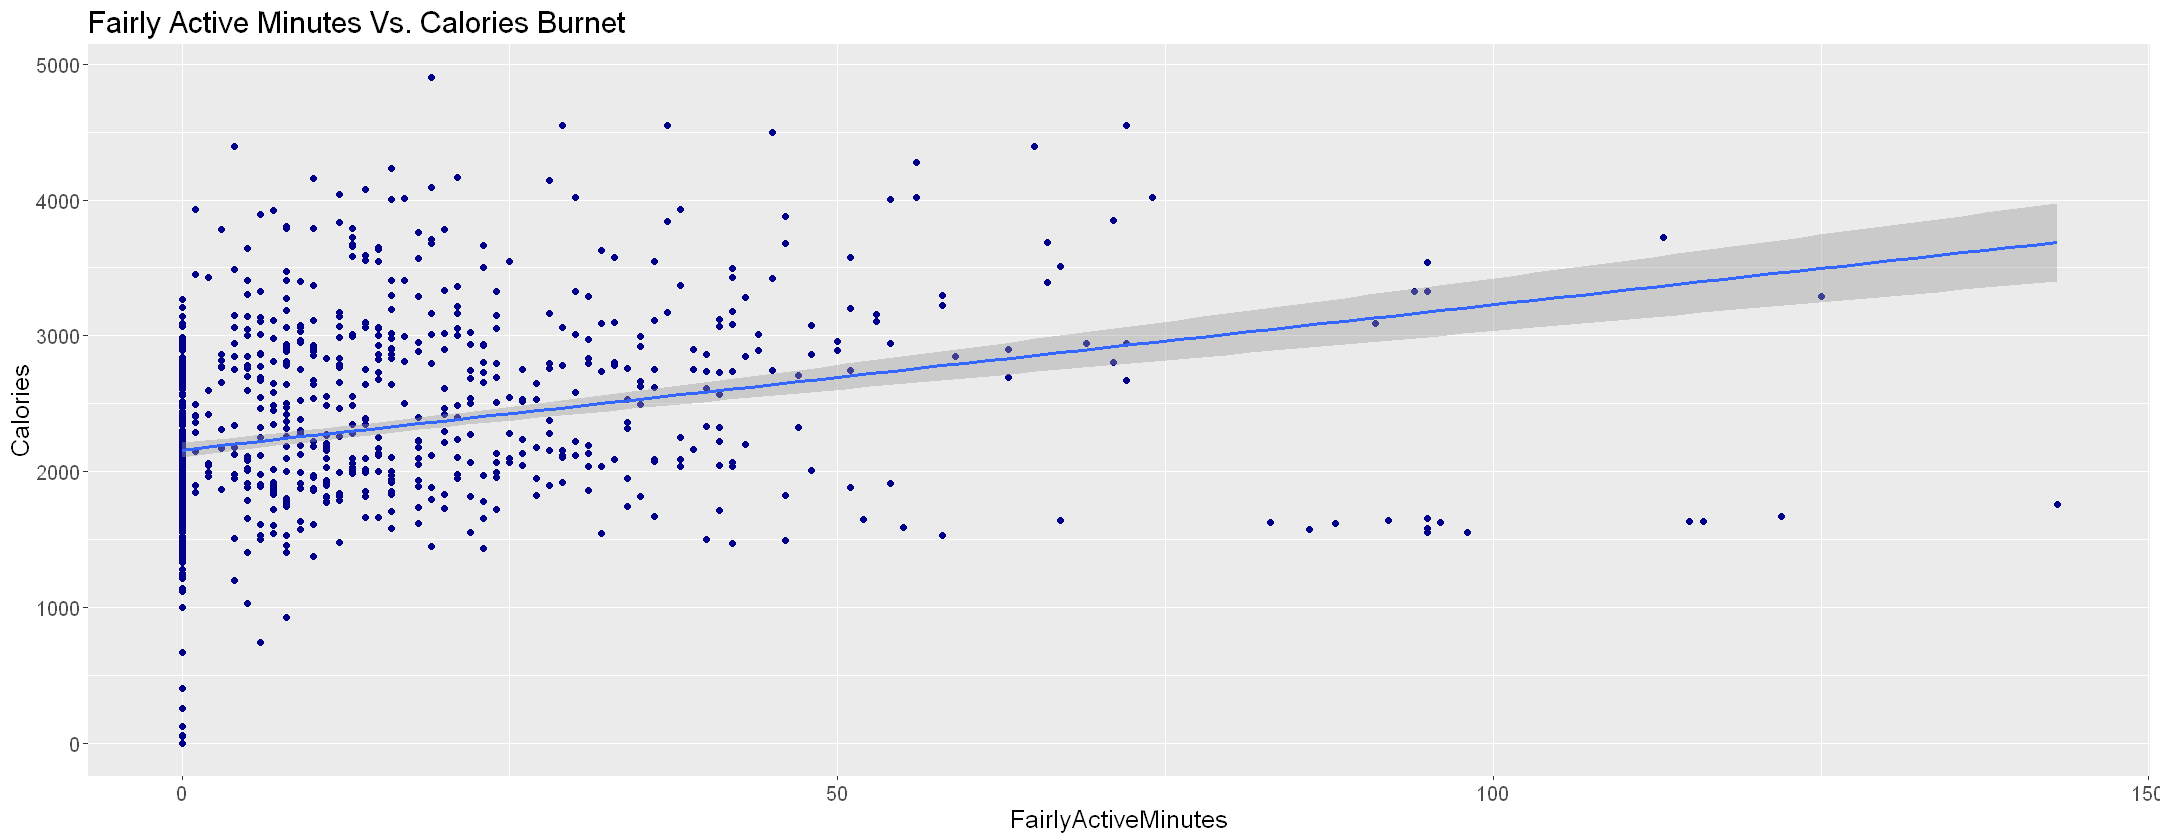

In [35]:
ggplot(dailyactivity, aes(y = Calories, x = FairlyActiveMinutes)) + geom_point(color = 'dark blue') +
stat_smooth (method = "lm") + labs (title = paste ("Fairly Active Minutes Vs. Calories Burnet")) + 
theme(text = element_text (size = 15))

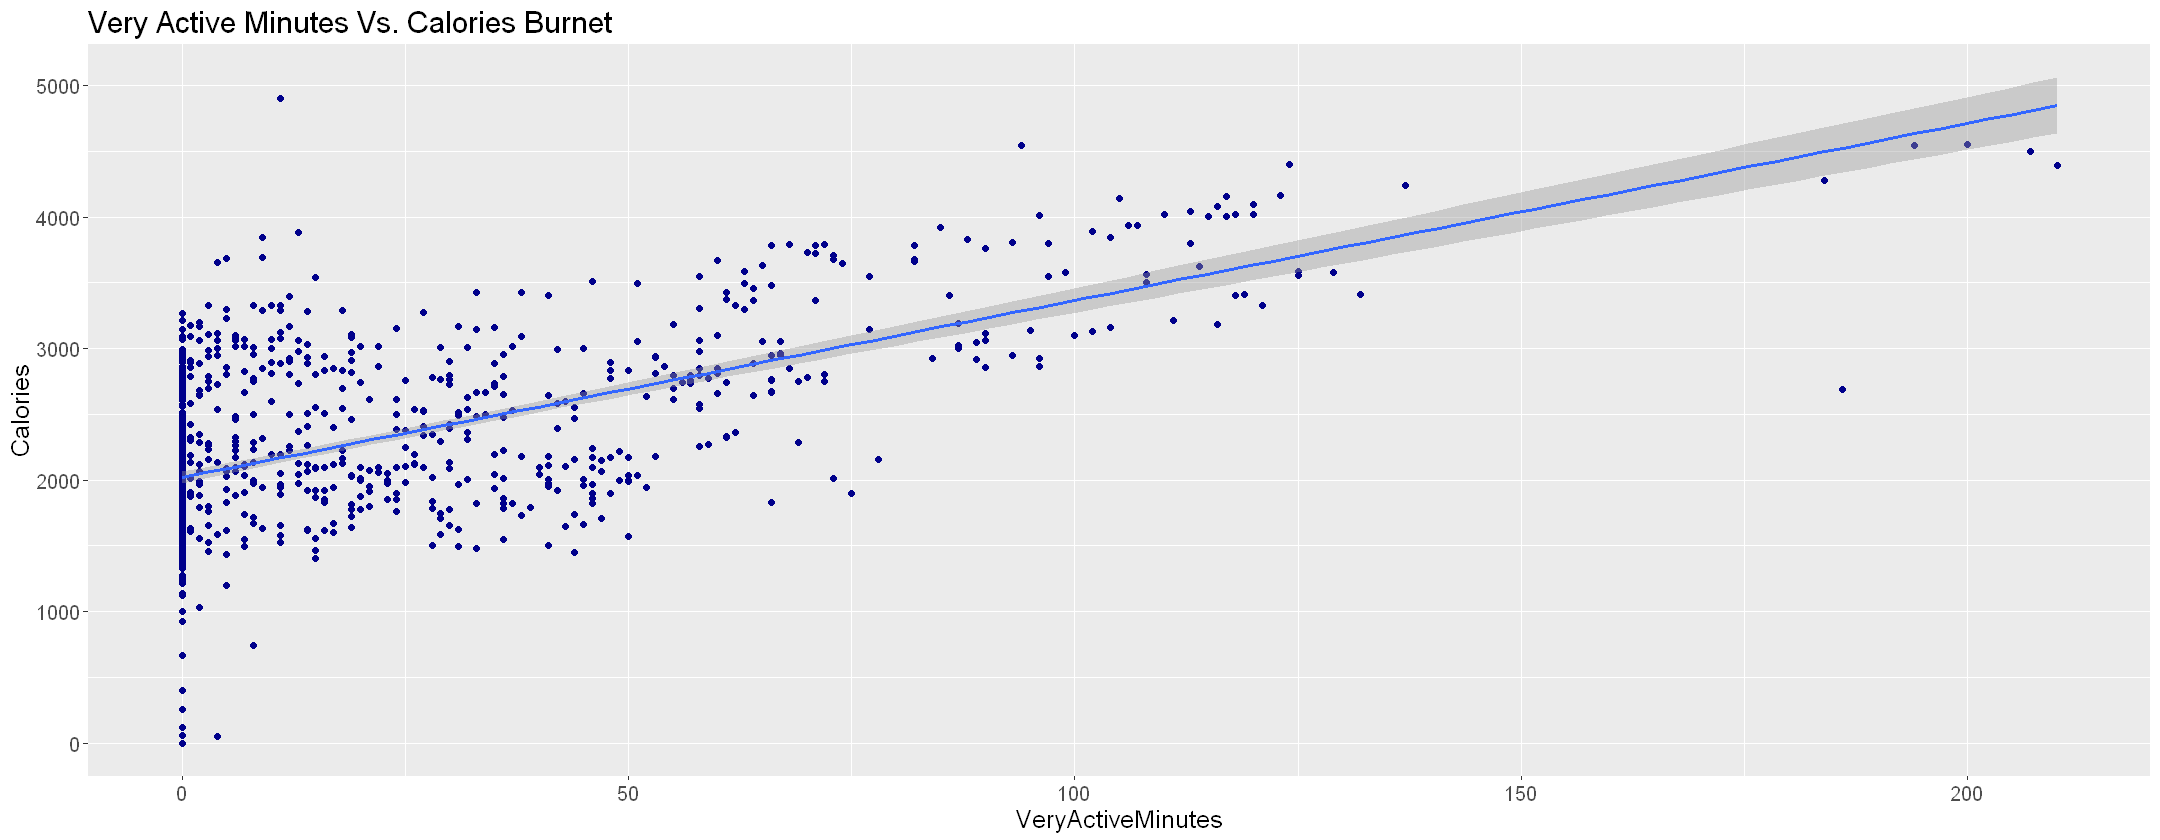

In [36]:
ggplot(dailyactivity, aes(y = Calories, x = VeryActiveMinutes)) + geom_point(color = 'dark blue') +
stat_smooth (method = "lm") + labs (title = paste ("Very Active Minutes Vs. Calories Burnet")) + 
theme(text = element_text (size = 15))

**Key insights on level of activities Vs calories burnet**

- The higher the activity level, the higher the correlation between calories burned and active minutes.

- The highest calories were burnet when participants were very active.

- Almost negative correlation was observed between sedentary minutes and calories burnet. 

**Sleep Analysis**

In [37]:
head (sleepDay,3)

Id,Date,Timestamp,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
1503960366,4/12/2016,00:00:00,1,327,346
1503960366,4/13/2016,00:00:00,2,384,407
1503960366,4/15/2016,00:00:00,1,412,442


In [38]:
sleepAnalysis <- mutate(sleepDay, TotalMinutesAwake = TotalTimeInBed - TotalMinutesAsleep)

In [39]:
head (sleepAnalysis,3)

Id,Date,Timestamp,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalMinutesAwake
1503960366,4/12/2016,00:00:00,1,327,346,19
1503960366,4/13/2016,00:00:00,2,384,407,23
1503960366,4/15/2016,00:00:00,1,412,442,30


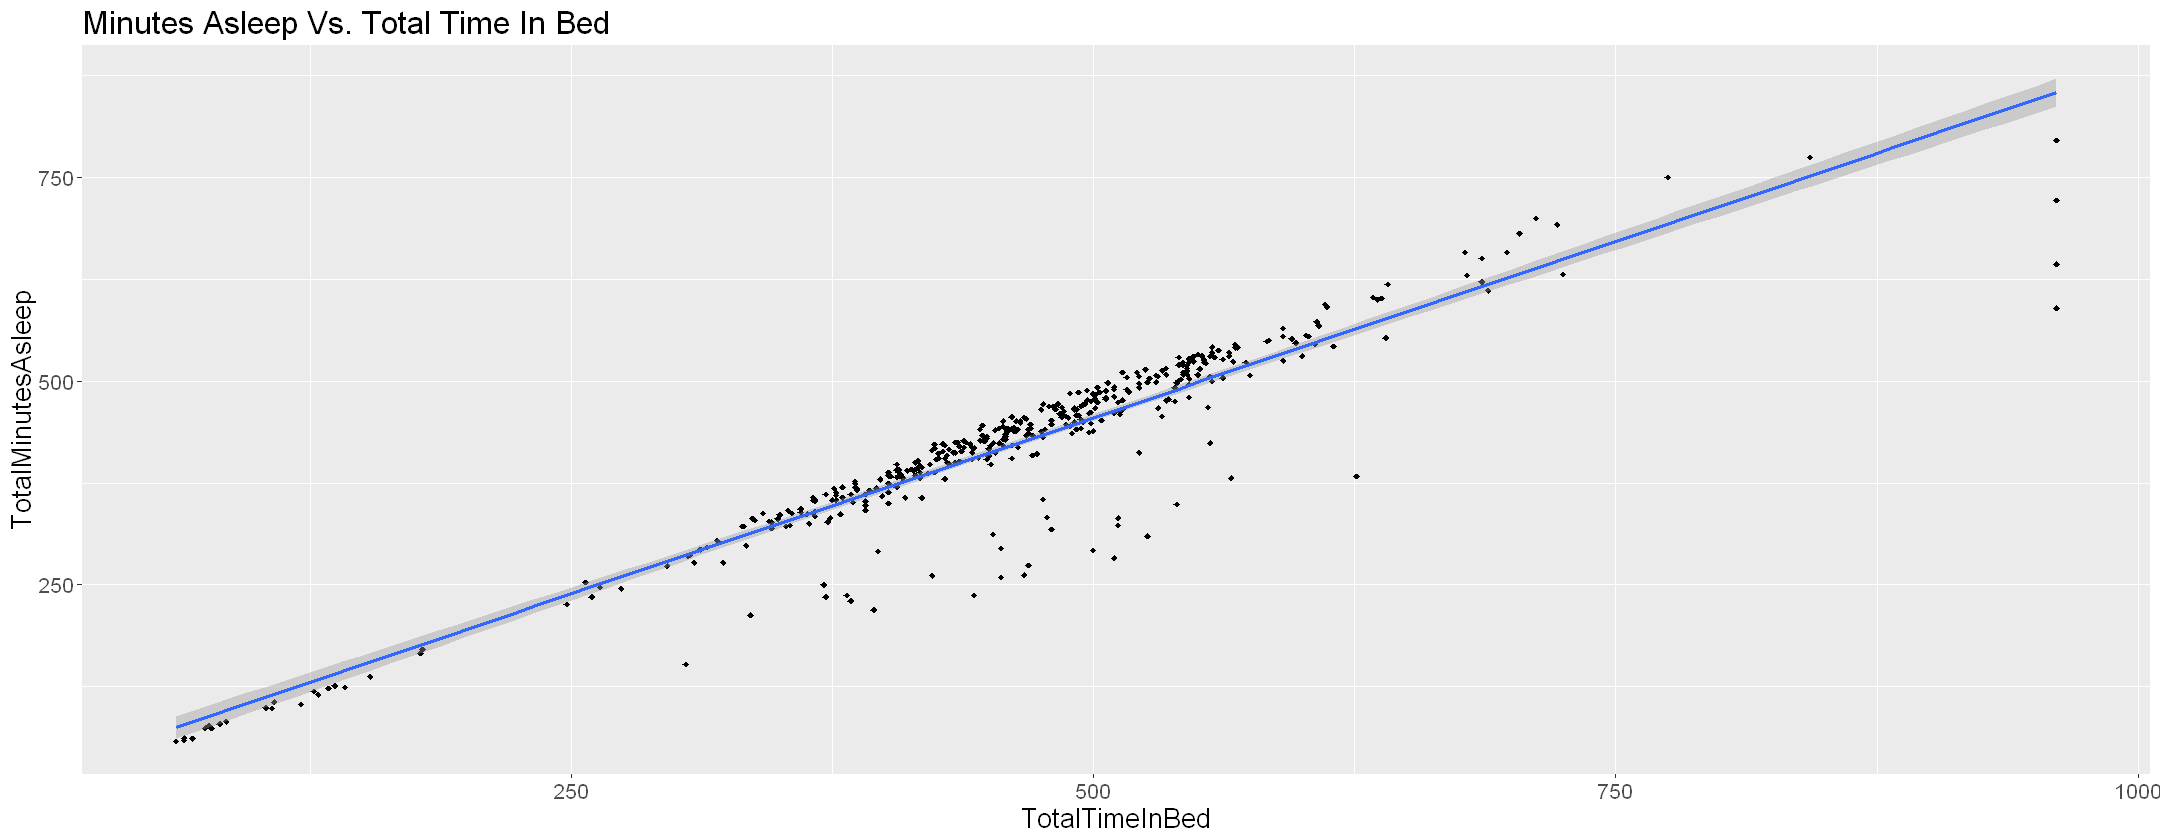

In [40]:
ggplot(sleepAnalysis, aes(y = TotalMinutesAsleep, x = TotalTimeInBed)) + geom_point(shape = 'diamond', color = 'black') +
stat_smooth (method = "lm") + labs (title = paste ("Minutes Asleep Vs. Total Time In Bed")) + 
theme(text = element_text (size = 16))

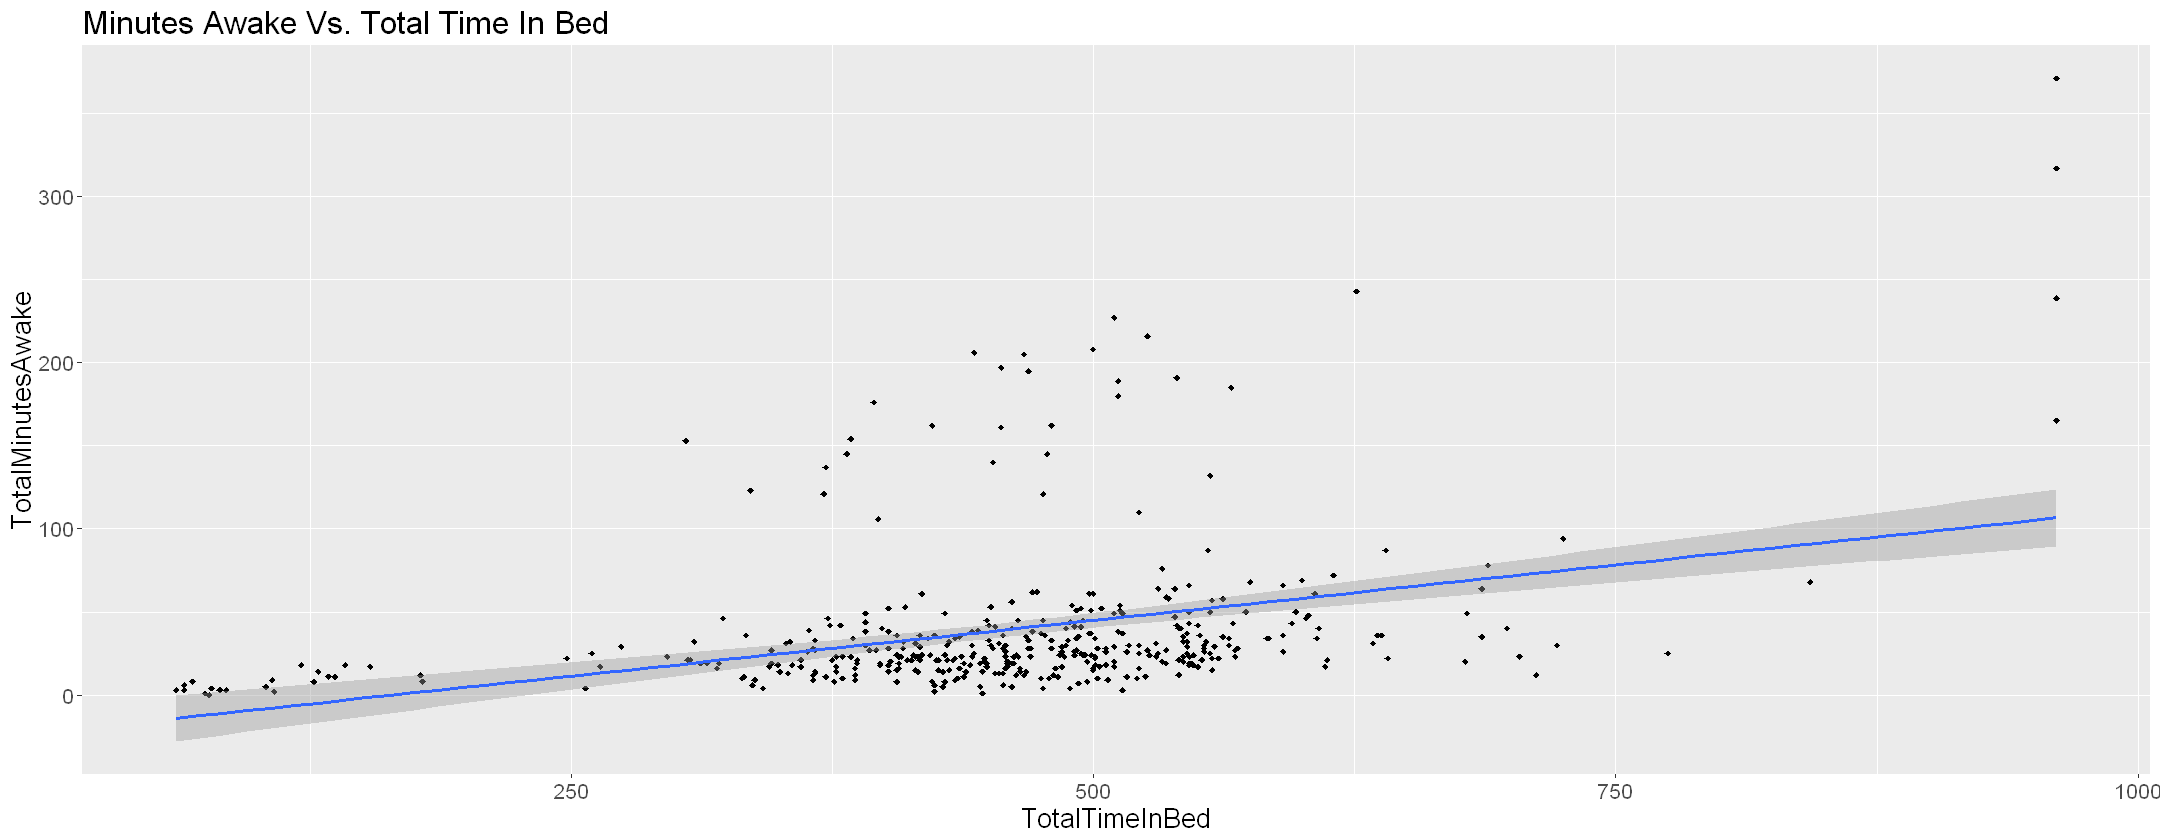

In [41]:
ggplot(sleepAnalysis, aes(y = TotalMinutesAwake, x = TotalTimeInBed)) + geom_point(shape = 'diamond', color = 'black') +
stat_smooth (method = "lm") + labs (title = paste ("Minutes Awake Vs. Total Time In Bed")) + 
theme(text = element_text (size = 16))

**Key insights on sleep analysis**

- There is a positive correlation between spending time in bed and the total minutes asleep. 

- Almost no correlation was observed between total times in bed and total minutes awake. Meaning, participants can minimize sleep duration by managing the amount of time they spend in bed. 

- The longer time participants spend in bed, there is a higher tendency for them to be asleep. 


## Phase 6 Act

**Final Conclusions** 


- There is a positive correlation between Steps Taken, intensities,  Active Minutes to Calories Burnt.
- There is a negative correalation between sedentary time and calories burnt.
- Evening times meaning after work/school hours (5PM -7PM) is the most convinent time where the maximum calories were burnt.
- There is also a strong correlation between times spent in bed and total minutes asleep. 

**Recommendations**

- Bellabeat could send reminders based on the sedentary minutes spent so participants can walk and move around instead. 
- Sending push notifications to participants during after work or school times as a reminder them to their routine workout and help them develop habit.
- Bellabeat can also implement reward schemes for best performing users by creating competitive ranges amoung other users. Best performing users can accumulate points that can be utilized to unlock new features. 
- Bellabeat can also send notification to users to go to bed in time for better use of time. 
- In order to attract new users, Bellabeat can extend their marketing strategies by incorporating new features like music streaming apps, nutrition feeds etc.